# Marketing Data EDA

## Exploratory & Statistical Analysis

### The Task 

The Chief Marketing Officer informs that recent marketing campaigns have not been as effective as they were expected to be. Being a marketing analyst, we need to analyze the data set to understand this problem and propose data-driven solutions.

### Part 01: Exploratory Data Analysis

* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them? 

### Part 02: Statistical Analysis

Run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to the CMO. Make sure to interpret your results * with non-statistical jargon so your CMO can understand your findings.

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are * significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
* Is there a significant relationship between geographical regional and success of a campaign? 

### Part 03: Data Visualization 

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming? Evaluation

### Preparing the Data ###

In [1]:
# import the libraries needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [2]:
data = pd.read_csv("marketing_data.csv")
data.sample(5)

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
618,10981,1988,Graduation,Married,"$84,219.00",0,0,2/2/14,27,434,...,10,1,0,0,0,0,0,0,0,SA
1318,7521,1952,Graduation,Together,"$83,844.00",0,0,5/12/13,57,901,...,11,1,0,0,1,0,0,0,0,CA
290,9699,1966,Graduation,Divorced,"$67,272.00",0,1,12/21/13,12,357,...,12,5,0,0,0,0,0,0,0,SP
50,1241,1984,2n Cycle,Married,"$14,796.00",1,0,9/17/12,1,13,...,3,9,0,0,0,0,0,1,0,GER
678,10524,1963,Master,Divorced,"$49,476.00",0,1,6/20/13,29,386,...,5,2,0,0,0,0,0,0,0,CA


In [3]:
data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
data.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Part 01 ###

### Feature Engineering

Looking at the data, there are several columns that we can process to create new columns from:

* Age: can be derived fron Year_Birth
* Age Group: can be derived from Age
* Totalchild: sum of kidhome and Teenhome

and there are also columns that need to be pre-processed, being
* Income: clean the row and change into float type
* Dt_Customer: change into pandas Datetime

In [7]:
#import the regEx library
import re

In [8]:
def get_age_group(age):
    if 18 <= age <= 35:
        return 'Millenial'
    elif 35 < age <= 50:
        return 'Gen X'
    elif 50 < age <= 70: 
        return 'Boomer'
    else: 
        return 'Silent'
    
# clean income
def clean_income(row):
    income = re.findall('\d+,\d+', row)
    income = re.sub('\W','',income)
    return income


In [18]:
data['Age'] = 2024 - data.YearBirth
data['Age_Group'] = data.Age.apply(get_age_group)
data['Total_Child'] = data.Kidhome + data.Teenhome
data.Income = data.Income.replace('[\$,]','', regex=True).astype('float')
data.DtCustomer = pd.to_datetime(data.DtCustomer)

data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Age_Group',
       'Total_Child'],
      dtype='object')

To make the analysis easier, let's divide data into multiple categories:
* behavioral
* demographics
* psychographics
* geographics
* products

In [26]:
col_behavioral = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds', 
    'NumDealsPurchases', 
    'NumWebPurchases', 
    'NumCatalogPurchases', 
    'NumStorePurchases', 
    'NumWebVisitsMonth', 
    'Recency'
    ]

col_demographics = [
    'YearBirth', 
    'Education', 
    'MaritalStatus', 
    'Income', 
    'Kidhome', 
    'Teenhome', 
    'DtCustomer'
    ]

col_psychographics = [
    'AcceptedCmp1', 
    'AcceptedCmp2', 
    'AcceptedCmp3', 
    'AcceptedCmp4', 
    'AcceptedCmp5', 
    'Response', 
    'Complain'
    ]

col_geographics = ['Country']

col_products = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
    ]

#### Are there null values or outiers? How to wrangele/handle them?

Looking at the data, we find several null values in the 'Income' feature. 

Since the null values comprise 1% of data (24 out of 2240 records), we decide to remove them. 

In [19]:
data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Age_Group               0
Total_Child             0
dtype: int64

In [23]:
# drop missing data
data = data.dropna()

#### Investigate the columns

In [27]:
# columns to be investigated
col_demographics
for i in col_demographics:
    print(data[i].value_counts())
 

YearBirth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1977    52
1958    52
1968    51
1959    50
1966    50
1960    49
1954    49
1955    48
1982    44
1967    44
1963    44
1962    44
1951    42
1986    41
1983    41
1957    41
1964    41
1980    39
1984    38
1981    38
1961    35
1953    35
1985    32
1949    30
1989    29
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     6
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: count, dtype: int64
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
MaritalStatus
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64
Income
7500.0   

On MaritalStatus column, we can see come anomalies. "Absurd", "Alone" and "YOLO" are not a marital status. Since these anomalies are responsible for only 7 rows, we decide to drop the rows.

In [38]:
data = data[~data.MaritalStatus.isin(['Absurd', 'Alone', 'YOLO'])]#.MaritalStatus.value_counts()

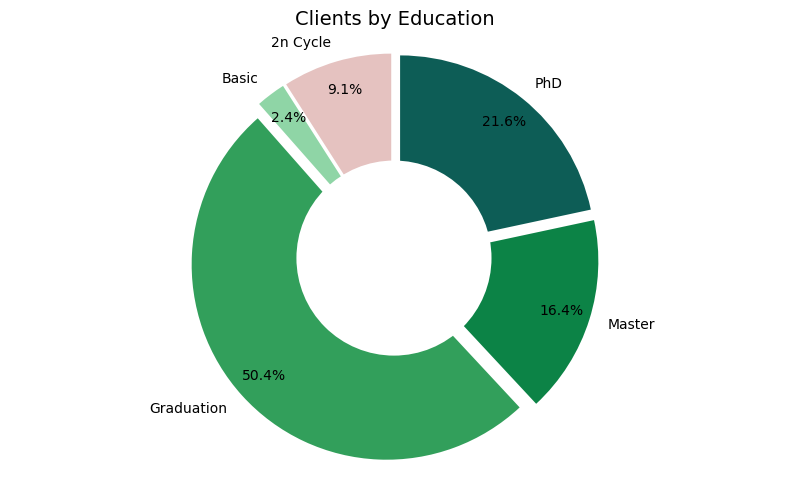

In [64]:
df = data.id.groupby(data.Education).count()

# Pie Chart 

# differentiate colors
colors = ["#e5c2c0","#8fd5a6","#329f5b","#0c8346","#0d5d56"]

# separate the chart slices
explode = (0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.pie(df.values, colors=colors, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# draw center circle
centre_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')

plt.title('Clients by Education', fontsize=14)

plt.tight_layout()
plt.show()

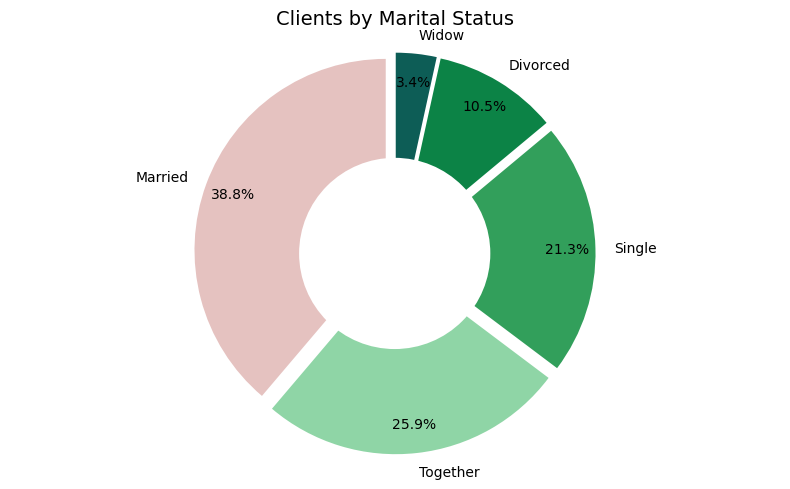

In [68]:
df = data.id.groupby(data.MaritalStatus).count()
df = df.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,5))
ax.pie(df.values, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, colors=colors)

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig =plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.title('Clients by Marital Status', fontsize=14)
plt.tight_layout()
plt.show()

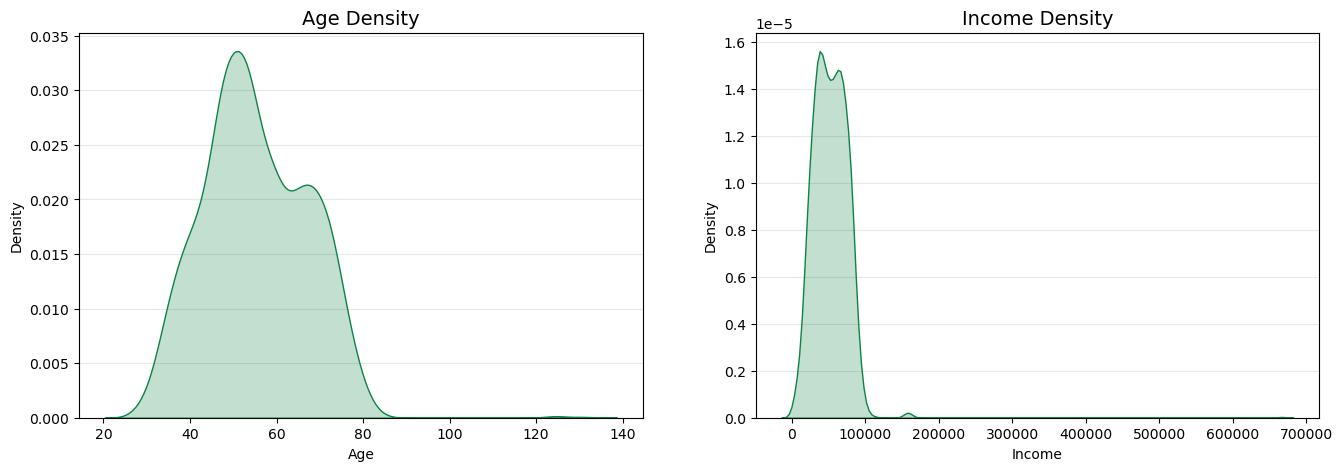

In [79]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.kdeplot(data.Age, ax=ax[0], fill=True, color=colors[3])
ax[0].set_title('Age Density', fontsize=14)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density')
ax[0].yaxis.grid(alpha=0.3)
ax[0].set_axisbelow(True)

sns.kdeplot(data.Income, ax=ax[1], fill=True, color=colors[3])
ax[1].set_title('Income Density', fontsize=14)
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Density')
ax[1].yaxis.grid(alpha=0.3)
ax[1].set_axisbelow(True)

plt.show()

From this plots we can see that both Age and Income features are right skewed, meaning that they contain outliers, so we'll investigate this data further.   

In [ ]:
fig, ax = plt.subplot(figsize=(8,6))